In [7]:
from __future__ import print_function    # (at top of module)
import requests
from furl import furl
from math import ceil
%matplotlib inline
from IPython.display import Image 
import matplotlib.pyplot as plt
import time
import timeit
import pandas as pd
import numpy as np
import re
import spotipy
import sys
import os
import json
import pprint
import seaborn as sns
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
import spotipy.util as util
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


<h1>- Acquire the Data

## Spotify Api Auth 

In [8]:
cid ="ae0dc287abd746f9bfc9fabb30966d0c" 
secret = "40c2e16da28c49e1839219c99e697910"
username= "Mohamad Eldebek"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

artist_name = []
track_name = []
track_id = [] 
popularity = []
album_name = []


for i in range(0,10000,50):
    track_results = sp.search(q='year:2018', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        album_name.append(t['album']['name'])
      



In [9]:
track_results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=year%3A2018&type=track&offset=9950&limit=50',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3zz0C9ZwusoYHsr5K8b0HW'},
       'href': 'https://api.spotify.com/v1/artists/3zz0C9ZwusoYHsr5K8b0HW',
       'id': '3zz0C9ZwusoYHsr5K8b0HW',
       'name': 'Alec Windt',
       'type': 'artist',
       'uri': 'spotify:artist:3zz0C9ZwusoYHsr5K8b0HW'}],
     'available_markets': ['AD',
      'AE',
      'AR',
      'AT',
      'AU',
      'BE',
      'BG',
      'BH',
      'BO',
      'BR',
      'CA',
      'CH',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DE',
      'DK',
      'DO',
      'DZ',
      'EC',
      'EE',
      'EG',
      'ES',
      'FI',
      'FR',
      'GB',
      'GR',
      'GT',
      'HK',
      'HN',
      'HU',
      'ID',
      'IE',
      'IL',
      'IN',
      'IS',
      'IT',
      'JO',
      'JP',
 

In [10]:
# get the artist names with Albums name and run through the Api to get the genre and then merge into the Df. 

In [11]:
print('number of elements in the track_name list:', len(track_name))

number of elements in the track_name list: 10000


In [12]:
# Get genres of artists
artist_genres = []     
for name in artist_name:
    genres = []
    artists = sp.search(q='artist:' + name, type='artist')
    genres.append(name)
    for i in range(len(artists['artists']['items'])):
        genre = artists['artists']['items'][i]['genres']
        if genre:
            genres.append(genre)

    artist_genres.append(genres)

retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...3secs
retrying ...1secs


In [13]:
artist_genres[0:10]

[['Post Malone', ['dfw rap', 'pop', 'rap']],
 ['A Boogie Wit da Hoodie', ['rap', 'trap music']],
 ['Meek Mill',
  ['hip hop', 'philly rap', 'pop', 'pop rap', 'rap', 'trap music']],
 ['Lil Baby', ['atl hip hop', 'atl trap', 'rap', 'trap music']],
 ['Travis Scott', ['pop', 'pop rap', 'rap']],
 ['YNW Melly'],
 ['Juice WRLD', ['chicago rap', 'trap music']],
 ['Billie Eilish', ['electropop', 'pop']],
 ['Marshmello', ['brostep', 'progressive electro house']],
 ['Post Malone', ['dfw rap', 'pop', 'rap']]]

In [22]:
# flatten series with list values to multiple rows
#df_expand = pd.DataFrame(df.column.tolist(), index=df.id).stack().reset_index(name=column)[["column","id"]]

In [15]:
df_test = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'album_name': album_name,'artist_genres':artist_genres,'track_id':track_id,'popularity':popularity})
print(df_test.shape)
df_test.head()


(10000, 6)


,artist_name,track_name,album_name,artist_genres,track_id,popularity
0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,"[Post Malone, [dfw rap, pop, rap]]",3KkXRkHbMCARz0aVfEt68P,92
1,A Boogie Wit da Hoodie,Swervin (feat. 6ix9ine),Hoodie SZN,"[A Boogie Wit da Hoodie, [rap, trap music]]",1wJRveJZLSb1rjhnUHQiv6,86
2,Meek Mill,Going Bad (feat. Drake),Championships,"[Meek Mill, [hip hop, philly rap, pop, pop rap...",2IRZnDFmlqMuOrYOLnZZyc,86
3,Lil Baby,Drip Too Hard (Lil Baby & Gunna),Drip Harder,"[Lil Baby, [atl hip hop, atl trap, rap, trap m...",78QR3Wp35dqAhFEc2qAGjE,85
4,Travis Scott,SICKO MODE,ASTROWORLD,"[Travis Scott, [pop, pop rap, rap]]",2xLMifQCjDGFmkHkpNLD9h,88


In [16]:
df_test.shape  

(10000, 6)

## Spotify Audio Features

In [18]:
#measuring the time
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_test['track_id']),batchsize):
    batch = df_test['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 0
Time to run this code (in seconds): 11.035160764000011


In [23]:
print('number of elements in the track_id list:', len(rows))

number of elements in the track_id list: 10000


In [24]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (10000, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.55600,https://api.spotify.com/v1/audio-analysis/3KkX...,0.760,158040,0.479,3KkXRkHbMCARz0aVfEt68P,0.0,2,0.0703,-5.574,1,0.0466,89.911,4,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,audio_features,spotify:track:3KkXRkHbMCARz0aVfEt68P,0.913
1,0.01530,https://api.spotify.com/v1/audio-analysis/1wJR...,0.581,189487,0.662,1wJRveJZLSb1rjhnUHQiv6,0.0,9,0.1110,-5.239,1,0.3030,93.023,4,https://api.spotify.com/v1/tracks/1wJRveJZLSb1...,audio_features,spotify:track:1wJRveJZLSb1rjhnUHQiv6,0.434
2,0.25900,https://api.spotify.com/v1/audio-analysis/2IRZ...,0.889,180522,0.496,2IRZnDFmlqMuOrYOLnZZyc,0.0,4,0.2520,-6.365,0,0.0905,86.003,4,https://api.spotify.com/v1/tracks/2IRZnDFmlqMu...,audio_features,spotify:track:2IRZnDFmlqMuOrYOLnZZyc,0.544
3,0.10300,https://api.spotify.com/v1/audio-analysis/78QR...,0.896,145543,0.671,78QR3Wp35dqAhFEc2qAGjE,0.0,1,0.5520,-6.977,0,0.2890,112.502,4,https://api.spotify.com/v1/tracks/78QR3Wp35dqA...,audio_features,spotify:track:78QR3Wp35dqAhFEc2qAGjE,0.358
4,0.00513,https://api.spotify.com/v1/audio-analysis/2xLM...,0.834,312820,0.730,2xLMifQCjDGFmkHkpNLD9h,0.0,8,0.1240,-3.714,1,0.2220,155.008,4,https://api.spotify.com/v1/tracks/2xLMifQCjDGF...,audio_features,spotify:track:2xLMifQCjDGFmkHkpNLD9h,0.446


In [25]:
df_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
acousticness        10000 non-null float64
analysis_url        10000 non-null object
danceability        10000 non-null float64
duration_ms         10000 non-null int64
energy              10000 non-null float64
id                  10000 non-null object
instrumentalness    10000 non-null float64
key                 10000 non-null int64
liveness            10000 non-null float64
loudness            10000 non-null float64
mode                10000 non-null int64
speechiness         10000 non-null float64
tempo               10000 non-null float64
time_signature      10000 non-null int64
track_href          10000 non-null object
type                10000 non-null object
uri                 10000 non-null object
valence             10000 non-null float64
dtypes: float64(9), int64(4), object(5)
memory usage: 1.4+ MB


<h1>- EDA

In [30]:
columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features.drop(columns_to_drop, axis=1,inplace=True)

df_audio_features.rename(columns={'id': 'track_id'}, inplace=True)

In [31]:
df_audio_features.shape

(10000, 14)

In [32]:
df_audio_features.head()

,acousticness,danceability,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.55600,0.760,158040,0.479,3KkXRkHbMCARz0aVfEt68P,0.0,2,0.0703,-5.574,1,0.0466,89.911,4,0.913
1,0.01530,0.581,189487,0.662,1wJRveJZLSb1rjhnUHQiv6,0.0,9,0.1110,-5.239,1,0.3030,93.023,4,0.434
2,0.25900,0.889,180522,0.496,2IRZnDFmlqMuOrYOLnZZyc,0.0,4,0.2520,-6.365,0,0.0905,86.003,4,0.544
3,0.10300,0.896,145543,0.671,78QR3Wp35dqAhFEc2qAGjE,0.0,1,0.5520,-6.977,0,0.2890,112.502,4,0.358
4,0.00513,0.834,312820,0.730,2xLMifQCjDGFmkHkpNLD9h,0.0,8,0.1240,-3.714,1,0.2220,155.008,4,0.446


In [33]:
df_audio_features.shape

(10000, 14)

In [34]:
df_audio_features.shape

(10000, 14)

### Merging the two Dataframes

In [35]:
# merge both dataframes
# the 'inner' method will make sure that we only keep track IDs present in both datasets
spotidata = pd.merge(df_test,df_audio_features,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features.shape)
spotidata.head()

Shape of the dataset: (10000, 14)


,artist_name,track_name,album_name,artist_genres,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,"[Post Malone, [dfw rap, pop, rap]]",3KkXRkHbMCARz0aVfEt68P,92,0.55600,0.760,158040,0.479,0.0,2,0.0703,-5.574,1,0.0466,89.911,4,0.913
1,A Boogie Wit da Hoodie,Swervin (feat. 6ix9ine),Hoodie SZN,"[A Boogie Wit da Hoodie, [rap, trap music]]",1wJRveJZLSb1rjhnUHQiv6,86,0.01530,0.581,189487,0.662,0.0,9,0.1110,-5.239,1,0.3030,93.023,4,0.434
2,Meek Mill,Going Bad (feat. Drake),Championships,"[Meek Mill, [hip hop, philly rap, pop, pop rap...",2IRZnDFmlqMuOrYOLnZZyc,86,0.25900,0.889,180522,0.496,0.0,4,0.2520,-6.365,0,0.0905,86.003,4,0.544
3,Lil Baby,Drip Too Hard (Lil Baby & Gunna),Drip Harder,"[Lil Baby, [atl hip hop, atl trap, rap, trap m...",78QR3Wp35dqAhFEc2qAGjE,85,0.10300,0.896,145543,0.671,0.0,1,0.5520,-6.977,0,0.2890,112.502,4,0.358
4,Travis Scott,SICKO MODE,ASTROWORLD,"[Travis Scott, [pop, pop rap, rap]]",2xLMifQCjDGFmkHkpNLD9h,88,0.00513,0.834,312820,0.730,0.0,8,0.1240,-3.714,1,0.2220,155.008,4,0.446


<h3> check for Missing values

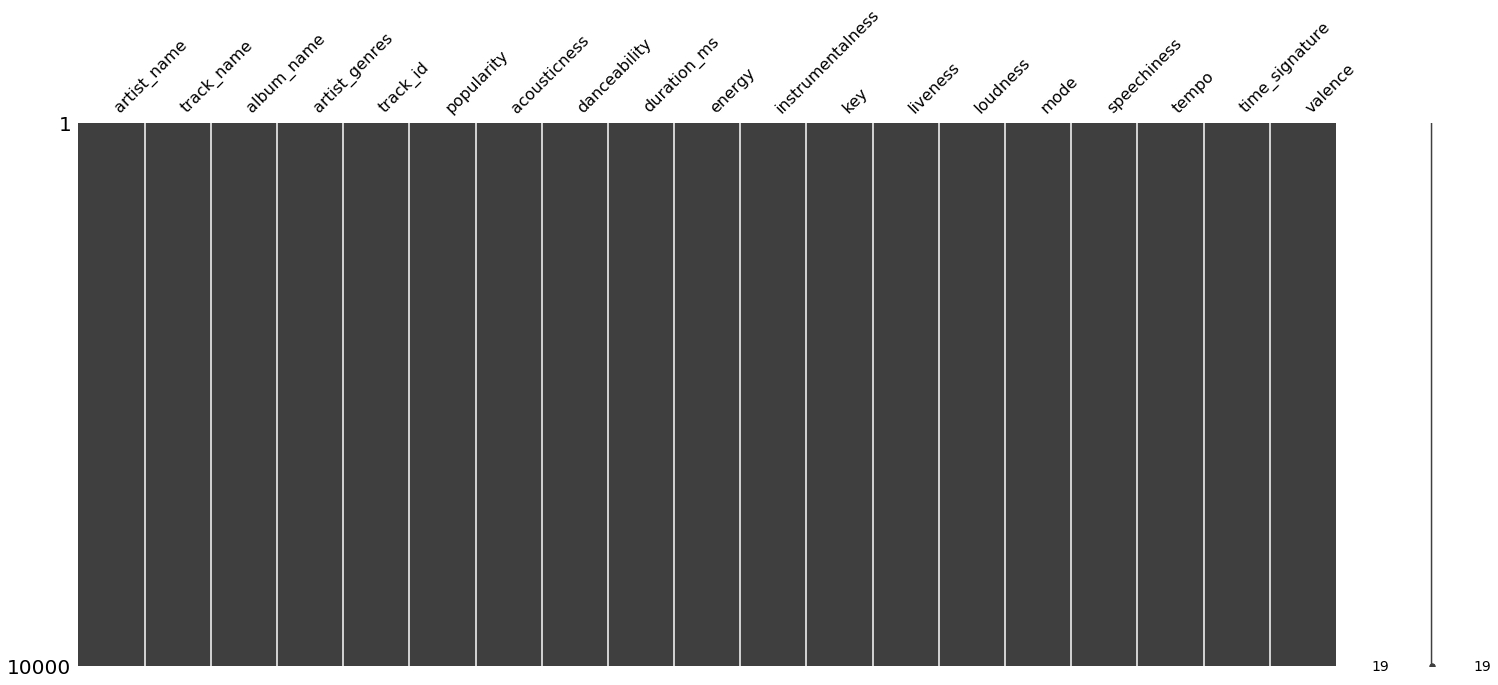

In [36]:
import missingno as msno
%matplotlib inline
msno.matrix(spotidata)

In [37]:
(spotidata.isna().sum()).sum()

0

In [38]:
spotidata.shape

(10000, 19)

In [39]:
spotidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 19 columns):
artist_name         10000 non-null object
track_name          10000 non-null object
album_name          10000 non-null object
artist_genres       10000 non-null object
track_id            10000 non-null object
popularity          10000 non-null int64
acousticness        10000 non-null float64
danceability        10000 non-null float64
duration_ms         10000 non-null int64
energy              10000 non-null float64
instrumentalness    10000 non-null float64
key                 10000 non-null int64
liveness            10000 non-null float64
loudness            10000 non-null float64
mode                10000 non-null int64
speechiness         10000 non-null float64
tempo               10000 non-null float64
time_signature      10000 non-null int64
valence             10000 non-null float64
dtypes: float64(9), int64(5), object(5)
memory usage: 1.5+ MB


In [ ]:

# group the entries by artist_name and track_name and check for duplicates

grouped = spotidata.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()

In [ ]:
#There are 1879 duplicate entries which will be dropped in this cell
spotidata.drop_duplicates(subset=['artist_name','track_name'], inplace=True)


In [ ]:
# verify the dropping
spotidata[spotidata.duplicated(subset=['artist_name','track_name'],keep=False)].count()

In [ ]:
spotidata[spotidata.duplicated(subset=['artist_name','track_name'],keep=False)]

In [ ]:
spotidata.shape

In [ ]:
spotidata.info()

In [ ]:
print(spotipop.shape)
print(spotipop.info())
spotipop.head()

In [ ]:
# with pd.option_context("display.max_rows", 200):
#     display(spotipop)

In [ ]:
spotidata.to_csv('spotidata.csv', index=False) 

In [ ]:
spotidata = pd.read_csv('spotidata.csv')

In [ ]:
spotidata.head()

In [ ]:
spotidata["artist_genres"]

In [ ]:
# create new dataframe df_pop ordered consisting of the 20 most popular tracks
df_pop = spotidata.sort_values('popularity', ascending=False)

In [ ]:
df_pop.reset_index(inplace = True) 

In [ ]:
df_pop

In [ ]:
bins = [0, 50, 68, 100]
df_pop['binned'] = pd.cut(df_pop['popularity'], bins)

In [ ]:
bins = [0, 50, 68, 100]
labels = [0,1,2]
df_pop['binned'] = pd.cut(df_pop['popularity'], bins=bins, labels=labels)

In [ ]:
df_pop

In [ ]:
# create a new DF with the new binned/classified popularity score 
df_popular = df_pop

In [ ]:
#rename the binned coulmn as Popular

df_popular.rename(columns={'binned':'Popular'},inplace=True)

In [ ]:
#drop the the popularity column and rename the binned one as Popular
df_popular[df_popular.columns.drop('popularity')]
df_popular = df_popular[df_popular.columns.drop('popularity')]

In [ ]:
df_popular

In [ ]:
import ast
# An Abstract Syntax-Tree is a data structure that represents a piece of code in a hierarchical manner, 
# and it greatly facilitates reasoning, analyzing, and even modifying the code in an automated way.

In [ ]:
# Break or flatten the values of the column 
df_pop["artist_genres"] = df_pop["artist_genres"].apply(lambda x: ast.literal_eval(x))

In [ ]:
df_pop.artist_genres[0]

In [ ]:
# flatten series with list values to multiple rows
df_G = pd.DataFrame(df_pop.artist_genres.tolist(), index=df_pop["index"]).stack().reset_index(name="artist_genres")

In [ ]:
df_G.head()

In [ ]:
df_G.artist_genres[0]

In [ ]:
# drop all the artist names by droping values == 0 from the df  
# df_G.loc[df_G.level_1 == 0] 

df_G.drop(df_G.index[df_G['level_1'] == 0], inplace = True)

In [ ]:
df_G.head()

In [ ]:
df_G1 = df_G

In [ ]:
#flatten to the final value for artist_genre
df_G1 = pd.DataFrame(df_G.artist_genres.tolist(), index=df_G["index"]).stack().reset_index(name="artist_genres")

In [ ]:
df_G1

In [ ]:

df_G1[df_G1['artist_genres'].str.match('pop')]

In [ ]:
sp.recommendation_genre_seeds()

In [ ]:
df_G2 = df_G1.apply(lambda x: 'pop' if 'pop' in x else x)


In [ ]:
print(type(df_G2))

In [ ]:
df_G2

In [ ]:
#replace all the genre that includes "pop" genres to "pop"
df_G2['artist_genres'] = df_G2.artist_genres.str.replace(r'(^.*pop.*$)', 'pop')
df_G2

In [ ]:
df_G2.head()

In [ ]:
# get the the word that occur the most and get the top 10 genre from that.
df_G2['artist_genres'].describe()

In [ ]:
# merge both dataframes
# the 'inner' method will make sure that we only keep track IDs present in both datasets
df_genre = pd.merge(df_G2,df_popular,on='index',how='inner')

In [ ]:
df_genre.rename(columns={'artist_genres_x':'artist_genres','artist_genres_y':'All_genres'},inplace=True)

In [ ]:
df_genre = df_genre[df_genre.columns.drop('level_1','instrumentalness')]


In [ ]:
# df_genre = df_genre[["index",'artist_name','artist_genres',
#                      'album_name','track_name',
#                      "All_genres","track_id",'Popular','acousticness','danceability',
#                      'duration_ms','energy','key','liveness','loudness',
#                      'speechiness','tempo','time_signature','valence']]



In [ ]:
df_genre['artist_genres'].unique().shape

In [ ]:
df_genre.to_csv('df_genre.csv', index=False) 

In [ ]:
df_genre['artist_genres'] = df_genre.artist_genres.str.replace(r'(^.*blues.*$)', 'blues')


In [ ]:
df_genre['artist_genres'].value_counts()

In [ ]:
df_genre.shape

In [ ]:
Top_Genre = df_genre[df_genre['artist_genres'].isin(['pop', 'rap',"hip hop","rock","house","r&b","indie",
                                                     "country","latin","metal","folk","blues"])]

In [ ]:
df_genre.head()

In [ ]:
Top_Genre = pd.read_csv("Top_Genre.csv")

In [ ]:
Top_Genre.head()

In [ ]:
grouped = Top_Genre.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()

In [ ]:
#There are 5413 duplicate entries which will be dropped in this cell
Top_Genre.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

In [ ]:
# check for any duplicates and drop them
Top_Genre[Top_Genre.duplicated(subset=['artist_name','track_name'],keep=False)].count()

In [ ]:
Top_Genre["track_name"].unique

In [ ]:
Top_Genre.head()

In [ ]:
Top_Genre= Top_Genre.reset_index(drop=True)

In [ ]:
Top_Genre.to_csv('Top_Genre.csv', index=False) 

In [ ]:
Top_Genre.head()
Top_Genre.shape

In [ ]:
Top_Genre["artist_genres"].value_counts()

In [ ]:
# Create a set of dummy variables from the artist_genres variable


genre_matrix = pd.get_dummies(Top_Genre["artist_genres"])

In [ ]:
genre_matrix.head()

In [ ]:
# Join the dummy variables to the main dataframe
spotifinal = pd.concat([Top_Genre, genre_matrix], axis=1)
spotifinal.head()


In [ ]:
spotifinal.columns

In [ ]:
spotifinal[spotifinal['rock']>0.5]

In [ ]:
spotifinal

In [ ]:
spotifinal.to_csv('spotifinal.csv', index=False) 

In [ ]:
spotifinal = pd.read_csv('spotifinal.csv')

In [ ]:
spotifinal.shape

In [ ]:
# Exploring Class Imbalance
print('Target Variable')
print(df_genre.groupby(["Popular"]).Popular.count())
print("\n")
print("0 = Unpopular")
print("1 = Popular")
print("2 = Very Popular")

# Target Variable Countplot
plt.figure(figsize = (10, 5))
sns.countplot(df_genre["Popular"], alpha = .70, palette = "BuPu")
plt.title("Popularity")
plt.ylabel("Songs")
plt.show()

In [ ]:
for col, col_data in x.iteritems():
    if str(col)=='item':
        col_data = pd.get_dummies(col_data, prefix = col)
        x = x.join(col_data)

In [ ]:
for genre, genre_data in df_genre.genre_data():
    if str(col)=='artist_genres':
        genre_data = df_genre.get_dummies(genre_data, prefix = col)
        df_genre = df_genre.join(genre_data)
print(df_genre)

In [ ]:
genre_count = spotifinal["artist_genres"].value_counts()
sns.set(style="darkgrid")
sns.barplot(genre_count.index, genre_count.values, alpha=0.8)
plt.title('Frequency Distribution of genres')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.figure(figsize=(15,20))
plt.show()

In [ ]:
# labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
# counts = cat_df_flights['carrier'].value_counts()
# sizes = [counts[var_cat] for var_cat in labels]
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
# ax1.axis('equal')
# plt.show()

In [ ]:
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from surprise.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(spotifinal['artist_genres'])

# creating a Series for the song titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(spotifinal.track_name)
indices[:5]

In [ ]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

In [ ]:
# function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_songs = []
    
    # gettin the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(spotifinal.track_name)[i])
        
    return recommended_songs

In [ ]:
recommendations('Amanece')

In [ ]:
spotifinal.loc[spotifinal['track_name'] == 'Mi Gente']

In [ ]:
spotifinal.columns

In [ ]:
# instantiating and generating the count matrix with multiple variables 
count = CountVectorizer()
count_matrix = count.fit_transform(spotifinal['artist_genres']) # [['artist_genres','Popular','danceability','energy']])

# creating a Series for the song titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(spotifinal.artist_name + ' - ' + spotifinal.track_name + ' - ' + spotifinal.artist_genres)
indices[:5]

In [ ]:
cosine_sim = cosine_similarity(count_matrixX, count_matrixX)
cosine_sim

In [ ]:
#print(count_matrix)
#access the count_matrix
#append the pop score for each song
count_matrix[0].A
#print(count_matrix)
type(count_matrix)



In [ ]:
count_matrix.shape

In [ ]:
# sample = numpy.append(count_matrix[0].A ,spotifinal['Popular'][0])
# sample

In [ ]:
# count_matrixX[0].A = numpy.append(count_matrixX[0].A , 2)
count_matrix.A
count_multiple_matrix = np.c_[count_matrix.A , spotifinal[['Popular','danceability','energy']]]

In [ ]:
count_multiple_matrix

In [ ]:
count_multiple_matrix.shape

In [ ]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_multiple_matrix, count_multiple_matrix)
cosine_sim

In [ ]:
# function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_songs = []
    
    # gettin the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(spotifinal.artist_name + ' - ' + spotifinal.track_name + ' - ' + spotifinal.artist_genres)[i])
        
    return recommended_songs

In [ ]:
recommendations('Amanece')

<h1>- Specifying item-based KNNBasic model


In [ ]:
from surprise import Dataset, SVD, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, Reader, NMF, SlopeOne, NormalPredictor, BaselineOnly, CoClustering
from surprise.model_selection import cross_validate
from surprise.similarities import cosine
from collections import defaultdict

import os
from surprise import SVDpp
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import BaselineOnly
from surprise import Reader
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV
from surprise import Trainset

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), NMF(), SlopeOne(), NormalPredictor(), BaselineOnly(), CoClustering()]:
    
# Perform cross validation
    results = cross_validate(algorithm, spotifinal, measures=['RMSE'], cv=3, verbose=False)
    
# Get results & append algorithm name
    tmp = pd.spotifinal.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.spotifinal(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [ ]:
#compare item-item

sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between *items*
               }
algo = KNNBaseline(cosine_sim=cosine_sim)

In [ ]:
# # Tracks Popularity with ratings above and equal to 84-94 as Very Popular
# df_pop[df_pop.popularity == 2]
# df_pop.loc[df_pop.popularity>=84, "popularity"] = 2

In [ ]:
# # Tracks Popularity with ratings between(70-84) as popular
# df_pop.loc[(df_pop.popularity < 84) & (df_pop.popularity != 2), "popularity"] = 1

In [ ]:
# # Tracks Popularity with score below 70 as unpopular
# df_pop.loc[(df_pop.popularity < 70) & (df_pop.popularity != 1 & df_pop.popularity != 2), "popularity"] = 0

In [ ]:
# we can create overlaid or side-by-side bargraph. You need to shift the x value by width to accommodate for two graphs.
from matplotlib import pyplot as plt
fig = plt.figure()
n = 1 # This is our first dataset (out of 2) 
t = 2 # Number of datasets 
d = 6 # Number of sets of bars 
w = 0.8 # Width of each bar 
dog_values = [t*element + w*n for element in range(d)] # essentially, this list comprehension gives us the position
# of the position of dogs
plt.bar(dog_values,dogs_age, color='green')
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
cat_values = [t*element + w*n for element in range(d)]
plt.bar(cat_values, cats_age, color = 'purple')
plt.legend(["track_name", "cats"])
n = 1

In [ ]:
client_id = 'ae0dc287abd746f9bfc9fabb30966d0c'
client_secret = '40c2e16da28c49e1839219c99e697910'
redirect_uri= "http://meldebek.com/callback/" 
scope = "playlist-read-private user-library-read"
if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print(": %s username" % (sys.argv[0],))
    sys.exit()

token = util.prompt_for_user_token(username,scope,client_id,client_secret,redirect_uri)

In [ ]:
cid ="ae0dc287abd746f9bfc9fabb30966d0c" 
secret = "40c2e16da28c49e1839219c99e697910"
username= "Mohamad Eldebek"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

artist_name = []
track_name = []
track_id = [] 
popularity = []
album_name = []


for i in range(0,10000,50):
    genre_pop_results = sp.search(q='genre:pop', type='track', limit=50,offset=i)
    for i, t in enumerate(genre_pop_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        album_name.append(t['album']['name'])
      
      

In [ ]:
genre_pop_results

In [ ]:
track_name

In [ ]:
df_genre_jazz = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'album_name': album_name,'track_id':track_id,'popularity':popularity})
print(df_genre_jazz.shape)
df_genre_jazz



In [ ]:
df_genre_pop

<h1> Input Songs for recommendation¶


In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [ ]:
# function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_songs = []
    
    # gettin the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(spotifinal.track_name)[i])
        
    return recommended_songs

In [ ]:
x = input()

In [ ]:
recommendations(x)

In [ ]:
recommendations('Amanece')

In [ ]:
S = widgets.Textarea(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

In [ ]:
S

In [ ]:
S.value

In [ ]:
interact(recommendations, title="Amanece")

In [ ]:
s = interact(f, x='Hi there!');

In [ ]:
title = spotifinal["track_name"]
idx = x
S = interact(recommendations, recommended_songs = idx)

In [ ]:
interact(recommendations, recommended_songs='Hi there!');

In [ ]:
# The popularity of a track is a value between 0 and 100, with 100 being the most popular. 
# The popularity is calculated by algorithm and is based, in the most part, on the total number of plays 
# the track has had and how recent those plays are.
# Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were 
# played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. 
# Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may 
# lag actual popularity by a few days: the value is not updated in real time.